----------------------------
----------------------------
----------------------------
## Limpieza

### Solución 1: Eliminar la observación (fila)


En __estadística__, este método se denomina __técnica de eliminación por lista__. En esta solución, descartamos toda la observación (fila) siempre que falte un valor (en una columna).

Este método debería aplicarse solo si estamos seguros de que los datos que faltan no son informativos. De lo contrario, deberíamos considerar otras soluciones.

Podría haber otros criterios a utilizar para descartar las observaciones.

Por ejemplo, cuando vimos el histograma de los datos faltantes, pusimos énfasis en que una cantidad pequeña de observaciones (filas) tiene más de 35 características (columnas) faltantes en total. Podemos crear un nuevo dataframe eliminando observaciones con __más de 35 características faltantes__. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

matplotlib.rcParams['figure.figsize']=(14,9)
df = pd.read_csv('data/train.csv')

<AxesSubplot:>

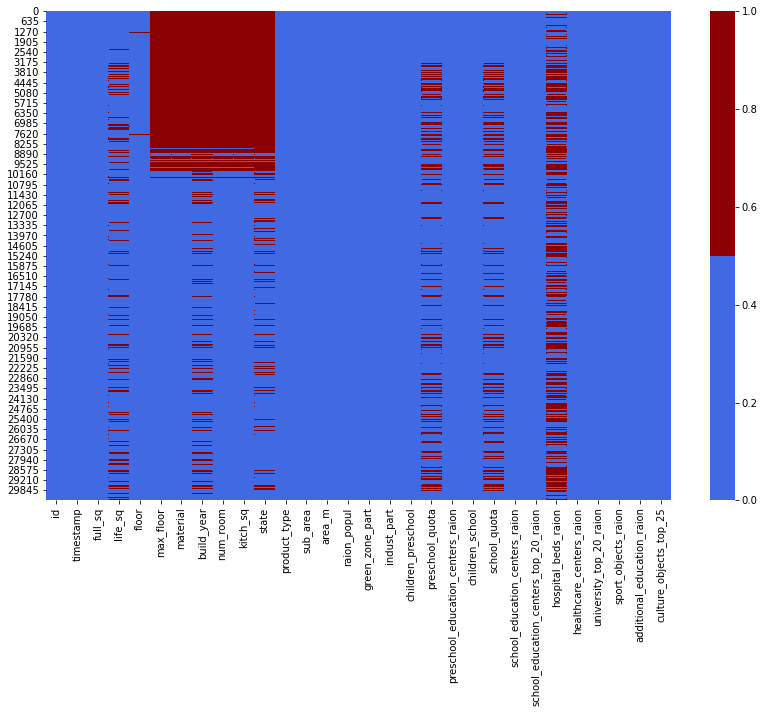

In [3]:
cols= df.columns[:30]
colores=['royalblue','darkred']
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colores))



In [4]:
diccionario={}
for caracteristica in df.columns:
    faltantes = np.mean(df[caracteristica].isnull())
    diccionario[caracteristica]=round(faltantes*100)

In [5]:
import operator
diccionario_orden = dict( sorted(diccionario.items(), key=operator.itemgetter(1),reverse=True))

for key in diccionario_orden:
    print(key+":"+str(diccionario_orden[key]))


hospital_beds_raion:47
build_year:45
state:44
cafe_sum_500_min_price_avg:44
cafe_sum_500_max_price_avg:44
cafe_avg_price_500:44
max_floor:31
material:31
num_room:31
kitch_sq:31
preschool_quota:22
school_quota:22
life_sq:21
cafe_sum_1000_min_price_avg:21
cafe_sum_1000_max_price_avg:21
cafe_avg_price_1000:21
raion_build_count_with_material_info:16
build_count_block:16
build_count_wood:16
build_count_frame:16
build_count_brick:16
build_count_monolith:16
build_count_panel:16
build_count_foam:16
build_count_slag:16
build_count_mix:16
raion_build_count_with_builddate_info:16
build_count_before_1920:16
build_count_1921-1945:16
build_count_1946-1970:16
build_count_1971-1995:16
build_count_after_1995:16
cafe_sum_1500_min_price_avg:14
cafe_sum_1500_max_price_avg:14
cafe_avg_price_1500:14
cafe_sum_2000_min_price_avg:6
cafe_sum_2000_max_price_avg:6
cafe_avg_price_2000:6
cafe_sum_3000_min_price_avg:3
cafe_sum_3000_max_price_avg:3
cafe_avg_price_3000:3
floor:1
prom_part_5000:1
cafe_sum_5000_min_pric

<AxesSubplot:xlabel='index'>

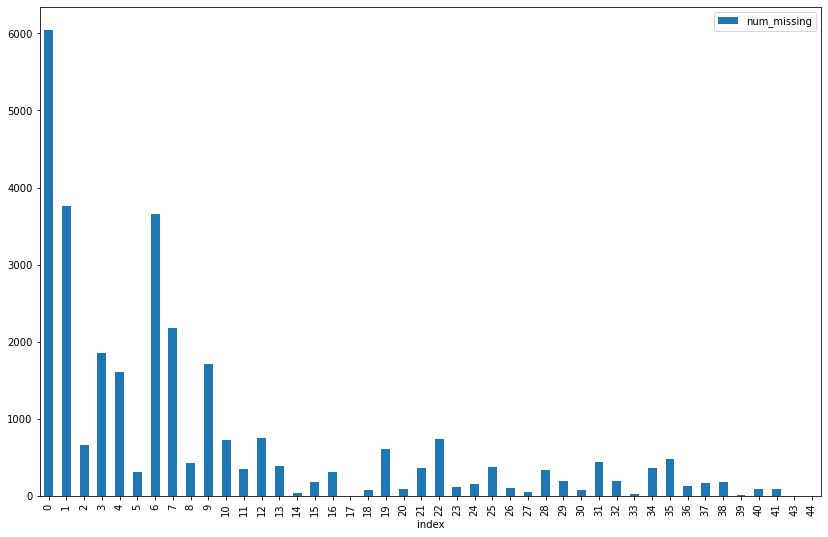

In [6]:
for col in df.columns:
    perdidos = df[col].isnull()
    num_missing = np.sum(perdidos)
    
    if num_missing > 0:
        #print('Generando un indicador para: {}'.format(col))
        df['{}_ismissing'.format(col)]= perdidos

        
#Basado en el feature, vamos a graficar el histograma de los datos perdidos

col_perdida= [caracteristica for caracteristica in df.columns if 'ismissing' in caracteristica]
df['num_missing'] = df[col_perdida].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')




In [7]:
df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_sum_2000_max_price_avg_ismissing,cafe_avg_price_2000_ismissing,cafe_sum_3000_min_price_avg_ismissing,cafe_sum_3000_max_price_avg_ismissing,cafe_avg_price_3000_ismissing,prom_part_5000_ismissing,cafe_sum_5000_min_price_avg_ismissing,cafe_sum_5000_max_price_avg_ismissing,cafe_avg_price_5000_ismissing,num_missing
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,9
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,6
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,6
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,7
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,6


In [15]:
100*df[df['num_missing']>=35].shape[0]/df.shape[0]

3.8364346427750977

In [13]:
porcentaje_faltante=float("{:.2f}".format(100*df[df['num_missing']>=35].shape[0]/df.shape[0]))
porcentaje_faltante

3.84

In [17]:
indice_a_eliminar= df[df['num_missing']>=35].index
type(indice_a_eliminar)
indice_a_eliminar

Int64Index([ 2042,  2263,  3254,  3257,  3261,  3266,  3274,  3275,  3280,
             3285,
            ...
            30185, 30190, 30220, 30225, 30290, 30309, 30312, 30329, 30353,
            30451],
           dtype='int64', length=1169)

In [18]:
df_filtrado = df.drop(indice_a_eliminar, axis=0)

In [19]:
print("Obs Original:"+str(df.shape[0])+" | Obs despues del filtro:" +str(df_filtrado.shape[0]))
print("Porcentaje Filtrado:"+str(porcentaje_faltante)+"%")

Obs Original:30471 | Obs despues del filtro:29302
Porcentaje Filtrado:3.84%


In [21]:
df[df['life_sq'].isna()]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_sum_2000_max_price_avg_ismissing,cafe_avg_price_2000_ismissing,cafe_sum_3000_min_price_avg_ismissing,cafe_sum_3000_max_price_avg_ismissing,cafe_avg_price_3000_ismissing,prom_part_5000_ismissing,cafe_sum_5000_min_price_avg_ismissing,cafe_sum_5000_max_price_avg_ismissing,cafe_avg_price_5000_ismissing,num_missing
559,560,2011-12-07,73,NaN,14.0,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,11
624,625,2011-12-15,110,NaN,26.0,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,10
783,784,2012-01-12,167,NaN,32.0,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,7
824,825,2012-01-16,53,NaN,6.0,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,7
834,835,2012-01-17,81,NaN,16.0,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30450,30453,2015-06-29,65,NaN,5.0,0.0,1.0,NaN,2.0,0.0,...,False,False,False,False,False,False,False,False,False,4
30451,30454,2015-06-29,37,NaN,3.0,3.0,1.0,0.0,1.0,1.0,...,True,True,True,True,True,True,True,True,True,39
30459,30462,2015-06-29,51,NaN,4.0,17.0,4.0,NaN,2.0,1.0,...,False,False,False,False,False,False,False,False,False,5
30465,30468,2015-06-30,52,NaN,13.0,17.0,1.0,NaN,2.0,1.0,...,False,False,False,False,False,False,False,False,False,2


In [22]:
df['life_sq'] = df['life_sq'].fillna(df['life_sq'].median())

In [23]:
df[df['life_sq'].isna()]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_sum_2000_max_price_avg_ismissing,cafe_avg_price_2000_ismissing,cafe_sum_3000_min_price_avg_ismissing,cafe_sum_3000_max_price_avg_ismissing,cafe_avg_price_3000_ismissing,prom_part_5000_ismissing,cafe_sum_5000_min_price_avg_ismissing,cafe_sum_5000_max_price_avg_ismissing,cafe_avg_price_5000_ismissing,num_missing


In [24]:
df_numericas =df.select_dtypes(include=[np.number])
df_numericas.shape

(30471, 277)

In [33]:
df_numericas.columns.values

array(['id', 'full_sq', 'life_sq', 'floor', 'max_floor', 'material',
       'build_year', 'num_room', 'kitch_sq', 'state', 'area_m',
       'raion_popul', 'green_zone_part', 'indust_part',
       'children_preschool', 'preschool_quota',
       'preschool_education_centers_raion', 'children_school',
       'school_quota', 'school_education_centers_raion',
       'school_education_centers_top_20_raion', 'hospital_beds_raion',
       'healthcare_centers_raion', 'university_top_20_raion',
       'sport_objects_raion', 'additional_education_raion',
       'culture_objects_top_25_raion', 'shopping_centers_raion',
       'office_raion', 'full_all', 'male_f', 'female_f', 'young_all',
       'young_male', 'young_female', 'work_all', 'work_male',
       'work_female', 'ekder_all', 'ekder_male', 'ekder_female',
       '0_6_all', '0_6_male', '0_6_female', '7_14_all', '7_14_male',
       '7_14_female', '0_17_all', '0_17_male', '0_17_female', '16_29_all',
       '16_29_male', '16_29_female', '0_13_a

In [27]:
for columna in df_numericas.columns.values:
    missing = df[columna].isnull()
    num_missing=np.sum(missing)

    if num_missing > 0:
        print("Imputar valores missing para "+columna)
        df['{}_ismissing'.format(columna)] =missing
        mediana=df[columna].median()
        df[columna] = df[columna].fillna(mediana)
        

Imputar valores missing para floor
Imputar valores missing para max_floor
Imputar valores missing para material
Imputar valores missing para build_year
Imputar valores missing para num_room
Imputar valores missing para kitch_sq
Imputar valores missing para state
Imputar valores missing para preschool_quota
Imputar valores missing para school_quota
Imputar valores missing para hospital_beds_raion
Imputar valores missing para raion_build_count_with_material_info
Imputar valores missing para build_count_block
Imputar valores missing para build_count_wood
Imputar valores missing para build_count_frame
Imputar valores missing para build_count_brick
Imputar valores missing para build_count_monolith
Imputar valores missing para build_count_panel
Imputar valores missing para build_count_foam
Imputar valores missing para build_count_slag
Imputar valores missing para build_count_mix
Imputar valores missing para raion_build_count_with_builddate_info
Imputar valores missing para build_count_before

In [31]:
df['life_sq'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
30466    False
30467    False
30468    False
30469    False
30470    False
Name: life_sq, Length: 30471, dtype: bool

In [32]:
for columna in df_numericas.columns.values:
    missing = df[columna].isnull()
    num_missing=np.sum(missing)

    if num_missing > 0:
        print("Algo hicimos mal"+columna)
        